<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/2-6factor-sm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Two-Level, Six-Factor Full Factorial Design with statsmodels
Introduction

This notebook roughly follows content from Box and Draper's Empirical Model-Building and Response Surfaces (Wiley, 1984). This content is covered by Chapter 4 of Box and Draper.

In this notebook, we'll carry out an anaylsis of a full factorial design, but instead of using Yates method, we use the statsmodels package and perform a OLS regression.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *
import statsmodels.formula.api as smf
seed(10)

In [3]:
import itertools

# Create the inputs:
encoded_inputs = list( itertools.product([-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1]) )

# Create the experiment design table (same as the book):
doe=pd.DataFrame(encoded_inputs)
doe=doe[doe.columns[::-1]]
doe.columns=['x%d'%(i+1) for i in range(6)]
doe

,x1,x2,x3,x4,x5,x6
0,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1
2,-1,1,-1,-1,-1,-1
3,1,1,-1,-1,-1,-1
4,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...
59,1,1,-1,1,1,1
60,-1,-1,1,1,1,1
61,1,-1,1,1,1,1
62,-1,1,1,1,1,1


In [4]:
# y-data from book.
doe['y1'] = [3.4, 9.7, 7.4, 10.6, 6.5, 7.9, 10.3, 9.5, 14.3, 10.5, 7.8, 17.2, 9.4, 12.1, 9.5, 15.8, 8.3, 8.0, 7.9, 10.7, 7.2, 7.2, 7.9, 10.2, 10.3, 9.9, 7.4, 10.5, 9.6, 15.1, 8.7, 12.1, 12.6, 10.5, 11.3, 10.6, 8.1, 12.5, 11.1, 12.9, 14.6, 12.7, 10.8, 17.1, 13.6, 14.6, 13.3, 14.4, 11.0, 12.5, 8.9, 13.1, 7.6, 8.6, 11.8, 12.4, 13.4, 14.6, 14.9, 11.8, 15.6, 12.8, 13.5, 15.8]
doe['y2'] = [15,5,23, 8,20, 9, 13, 5, 23, 1, 11, 5, 15, 8, 15, 1, 22, 8, 16, 7, 25, 5, 17, 8, 10, 3, 22, 6, 24, 4, 10, 5, 32, 10, 28, 18, 22, 31, 17, 16, 38, 12, 34, 19, 12, 14, 25, 16, 31, 14, 23, 23, 28, 20, 18, 11, 39, 30, 31, 6, 33, 23, 31, 11]
doe['y3'] = [36, 35, 37, 34, 30, 32, 28, 38, 40, 32, 32, 28, 34, 26,  30, 28, 40, 30, 35, 35, 32, 35, 36, 32, 20, 35, 35, 28, 27, 36, 36, 35, 32, 34, 30, 24, 30, 20, 32, 25, 20, 20, 22, 35, 26, 15, 19, 24, 22, 23, 22, 18, 20, 20, 20, 36, 20, 11, 20, 35, 16, 32, 20, 20]
print(doe[['y1','y2','y3']])

      y1  y2  y3
0    3.4  15  36
1    9.7   5  35
2    7.4  23  37
3   10.6   8  34
4    6.5  20  30
..   ...  ..  ..
59  11.8   6  35
60  15.6  33  16
61  12.8  23  32
62  13.5  31  20
63  15.8  11  20

[64 rows x 3 columns]


In [5]:
labels = {}
labels[1] = ['x1','x2','x3','x4','x5','x6']
for i in [2,3,4,5,6]:
    labels[i] = list(itertools.combinations(labels[1], i))

obs_list = ['y1','y2','y3']
print(str(labels[1][0:6]))

['x1', 'x2', 'x3', 'x4', 'x5', 'x6']


In [7]:

a = lambda z : print(str(labels[1][z]), end=' + ')
b = lambda z : print(str(labels[2][z][0]+':'+labels[2][z][1]), end=' + ')
c = lambda z : print(str(labels[3][z][0]+':'+labels[3][z][1]+':'+labels[3][z][2]), end=' + ')
d = lambda z : print(str(labels[4][z][0]+':'+labels[4][z][1]+':'+labels[4][z][2]+':'+labels[4][z][3]), end=' + ')
e = lambda z : print(str(labels[5][z][0]+':'+labels[5][z][1]+':'+labels[5][z][2]+':'+labels[5][z][3]+':'+labels[5][z][4]), end=' + ')
f = lambda z : print(str(labels[6][z][0]+':'+labels[6][z][1]+':'+labels[6][z][2]+':'+labels[6][z][3]+':'+labels[6][z][4]+':'+labels[6][z][5]), end=' ')


for j in range(0,len(labels[1])):
  a(j)
for j in range(0,len(labels[2])):
  b(j)
for j in range(0,len(labels[3])):
  c(j)
for j in range(0,len(labels[4])):
  d(j)
for j in range(0,len(labels[5])):
  e(j)
for j in range(0,len(labels[6])):
  f(j)


x1 + x2 + x3 + x4 + x5 + x6 + x1:x2 + x1:x3 + x1:x4 + x1:x5 + x1:x6 + x2:x3 + x2:x4 + x2:x5 + x2:x6 + x3:x4 + x3:x5 + x3:x6 + x4:x5 + x4:x6 + x5:x6 + x1:x2:x3 + x1:x2:x4 + x1:x2:x5 + x1:x2:x6 + x1:x3:x4 + x1:x3:x5 + x1:x3:x6 + x1:x4:x5 + x1:x4:x6 + x1:x5:x6 + x2:x3:x4 + x2:x3:x5 + x2:x3:x6 + x2:x4:x5 + x2:x4:x6 + x2:x5:x6 + x3:x4:x5 + x3:x4:x6 + x3:x5:x6 + x4:x5:x6 + x1:x2:x3:x4 + x1:x2:x3:x5 + x1:x2:x3:x6 + x1:x2:x4:x5 + x1:x2:x4:x6 + x1:x2:x5:x6 + x1:x3:x4:x5 + x1:x3:x4:x6 + x1:x3:x5:x6 + x1:x4:x5:x6 + x2:x3:x4:x5 + x2:x3:x4:x6 + x2:x3:x5:x6 + x2:x4:x5:x6 + x3:x4:x5:x6 + x1:x2:x3:x4:x5 + x1:x2:x3:x4:x6 + x1:x2:x3:x5:x6 + x1:x2:x4:x5:x6 + x1:x3:x4:x5:x6 + x2:x3:x4:x5:x6 + x1:x2:x3:x4:x5:x6 

In [39]:

mod = smf.ols(formula='y1 ~ x1 + x2 + x3 + x4 + x5 + x6 + x1:x2 + x1:x3 + x1:x4 + x1:x5 + x1:x6 + x2:x3 + x2:x4 + x2:x5 + x2:x6 + x3:x4 + x3:x5 + x3:x6 + x4:x5 + x4:x6 + x5:x6 + x1:x2:x3 + x1:x2:x4 + x1:x2:x5 + x1:x2:x6 + x1:x3:x4 + x1:x3:x5 + x1:x3:x6 + x1:x4:x5 + x1:x4:x6 + x1:x5:x6 + x2:x3:x4 + x2:x3:x5 + x2:x3:x6 + x2:x4:x5 + x2:x4:x6 + x2:x5:x6 + x3:x4:x5 + x3:x4:x6 + x3:x5:x6 + x4:x5:x6 + x1:x2:x3:x4 + x1:x2:x3:x5 + x1:x2:x3:x6 + x1:x2:x4:x5 + x1:x2:x4:x6 + x1:x2:x5:x6 + x1:x3:x4:x5 + x1:x3:x4:x6 + x1:x3:x5:x6 + x1:x4:x5:x6 + x2:x3:x4:x5 + x2:x3:x4:x6 + x2:x3:x5:x6 + x2:x4:x5:x6 + x3:x4:x5:x6 + x1:x2:x3:x4:x5 + x1:x2:x3:x4:x6 + x1:x2:x3:x5:x6 + x1:x2:x4:x5:x6 + x1:x3:x4:x5:x6 + x2:x3:x4:x5:x6', data=doe)

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     4.542
Date:                Tue, 24 Sep 2024   Prob (F-statistic):              0.359
Time:                        20:37:22   Log-Likelihood:                 22.476
No. Observations:                  64   AIC:                             81.05
Df Residuals:                       1   BIC:                             217.1
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.1234      0.170     65.312      0.010       8.959      13.287
x1                 0.8734      0.170      5.128      0.123      -1.291       3.037
x2                 0.3516      0.170      2.064      0.287      -1.812       2.516
x3                 0.0516      0.170      0.303      0.813      -2.112       2.216
x4                 1.4922      0.170      8.761      0.072      -0.672       3.656
x5                -0.2078      0.170     -1.220      0.437      -2.372       1.956
x6                 1.3453      0.170      7.899      0.080      -0.819       3.509
x1:x2              0.4453      0.170      2.615      0.233      -1.719       2.609
x1:x3              0.0703      0.170      0.413      0.751      -2.094       2.234
x1:x4              0.0734      0.170      0.431      0.741      -2.091       2.237
x1:x5             -0.2078      0.170     -1.220      0.437      -2.372       1.956
x1:x6             -0.4109      0.170     -2.413      0.250      -2.575       1.753
x2:x3              0.2984      0.170      1.752      0.330      -1.866       2.462
x2:x4             -0.4297      0.170     -2.523      0.240      -2.594       1.734
x2:x5             -0.1672      0.170     -0.982      0.506      -2.331       1.997
x2:x6             -0.0891      0.170     -0.523      0.693      -2.253       2.075
x3:x4              0.2016      0.170      1.183      0.447      -1.962       2.366
x3:x5              0.0391      0.170      0.229      0.856      -2.125       2.203
x3:x6             -0.1078      0.170     -0.633      0.641      -2.272       2.056
x4:x5             -0.1578      0.170     -0.927      0.524      -2.322       2.006
x4:x6              0.0078      0.170      0.046      0.971      -2.156       2.172
x5:x6              0.1328      0.170      0.780      0.578      -2.031       2.297
x1:x2:x3          -0.3266      0.170     -1.917      0.306      -2.491       1.837
x1:x2:x4           0.4078      0.170      2.394      0.252      -1.756       2.572
x1:x2:x5          -0.1359      0.170     -0.798      0.571      -2.300       2.028
x1:x2:x6          -0.1266      0.170     -0.743      0.593      -2.291       2.037
x1:x3:x4           0.2016      0.170      1.183      0.447      -1.962       2.366
x1:x3:x5           0.0328      0.170      0.193      0.879      -2.131       2.197
x1:x3:x6           0.0547      0.170      0.321      0.802      -2.109       2.219
x1:x4:x5          -0.1641      0.170     -0.963      0.512      -2.328       2.000
x1:x4:x6          -0.2797      0.170     -1.642      0.348      -2.444       1.884
x1:x5:x6           0.0516      0.170      0.303      0.813      -2.112       2.216
x2:x3:x4          -0.2016      0.170     -1.183      0.447      -2.366       1.962
x2:x3:x5           0.0609      0.170      0.358      0.781      -2.103       2.225
x2:x3:x6    

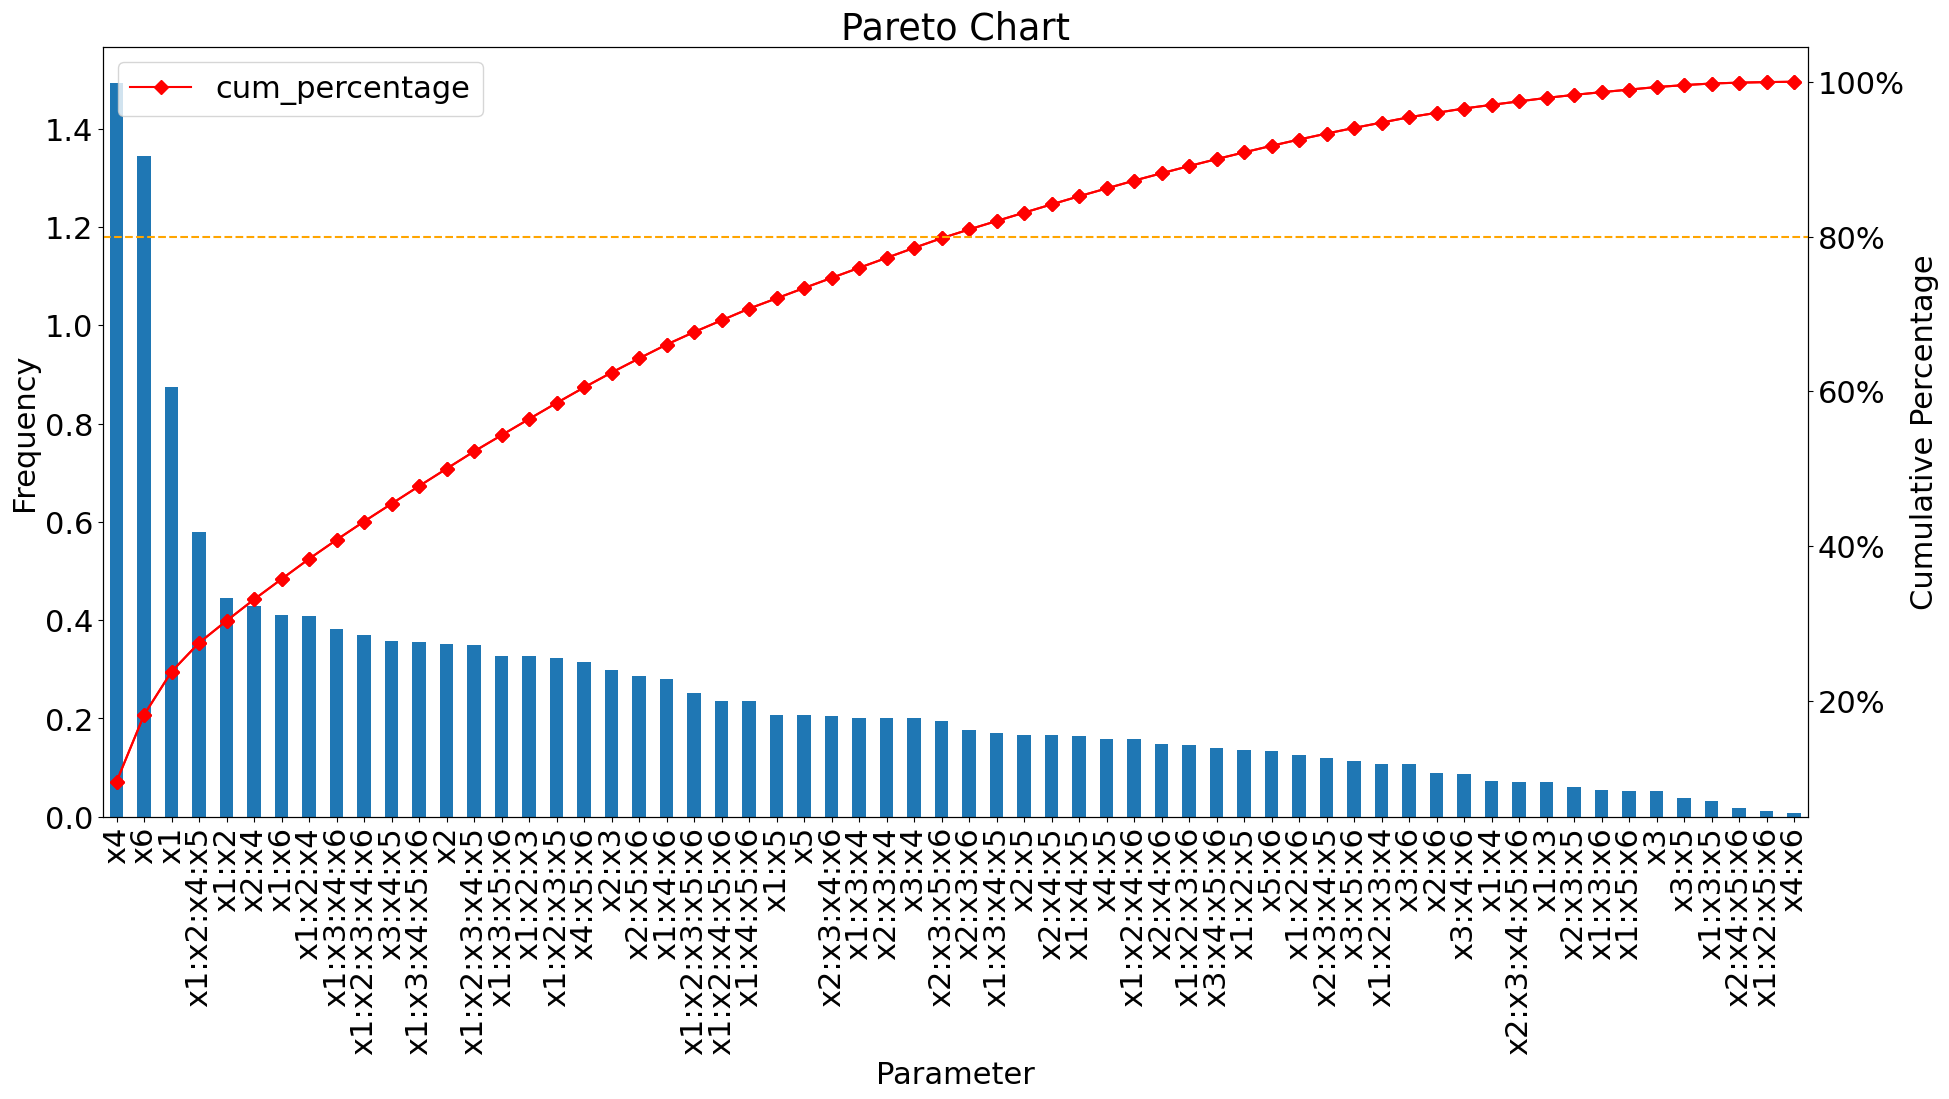

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


effects=pd.DataFrame()

# the standardised effects are the absolute values of the coefficients obtained from the OLS.
effects['Standardized effect']=pd.DataFrame(np.abs(res.params[1:]))


effects_sorted = effects.sort_values(by='Standardized effect', ascending=False)


# Add cumulative percentage column.
effects_sorted["cum_percentage"] = round(effects_sorted["Standardized effect"].cumsum()/effects_sorted["Standardized effect"].sum()*100,2)

# and plot Pareto Chart
plt.rcParams.update({'font.size': 22})
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.set_title("Pareto Chart")
ax.set_xlabel("Parameter")
ax.set_ylabel("Frequency");
effects_sorted['Standardized effect'].plot.bar(ax=ax)

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(effects_sorted.index, effects_sorted["cum_percentage"], color="red", marker="D", ms=7)
effects_sorted.plot(y="cum_percentage", color="red", marker="D", ms=7, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");
ax2.axhline(80, color="orange", linestyle="dashed")

In [41]:
effects_sorted

,Standardized effect,cum_percentage
x4,1.492188,9.56
x6,1.345312,18.19
x1,0.873437,23.78
x1:x2:x4:x5,0.579688,27.50
x1:x2,0.445312,30.35
...,...,...
x3:x5,0.039062,99.56
x1:x3:x5,0.032812,99.77
x2:x4:x5:x6,0.017187,99.88
x1:x2:x5:x6,0.010937,99.95


How to Draw a Normal Probability Plot By Hand

- Arrange your x-values in ascending order (smallest to largest).

- Calculate fi = (i – 0.375)/(n + 0.25), where i is the position of the data value in the ordered list and n is the number of observations.

- Find the z-score for each fi

- Plot your x-values on the horizontal axis and the corresponding z-score
on the vertical axis.

# what do we see?

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Axes: ylabel='Count'>

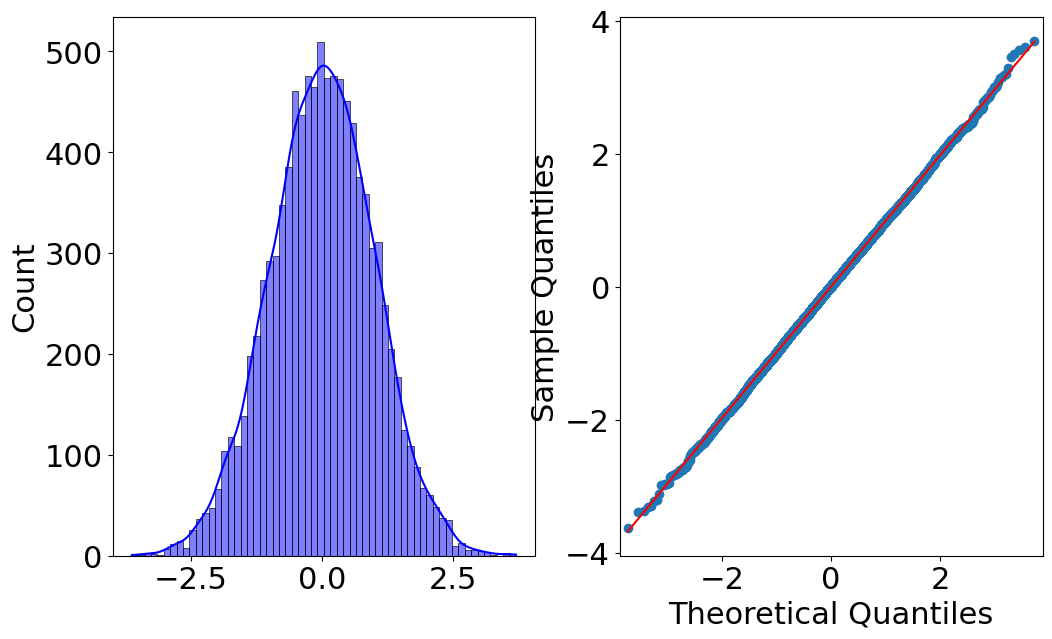

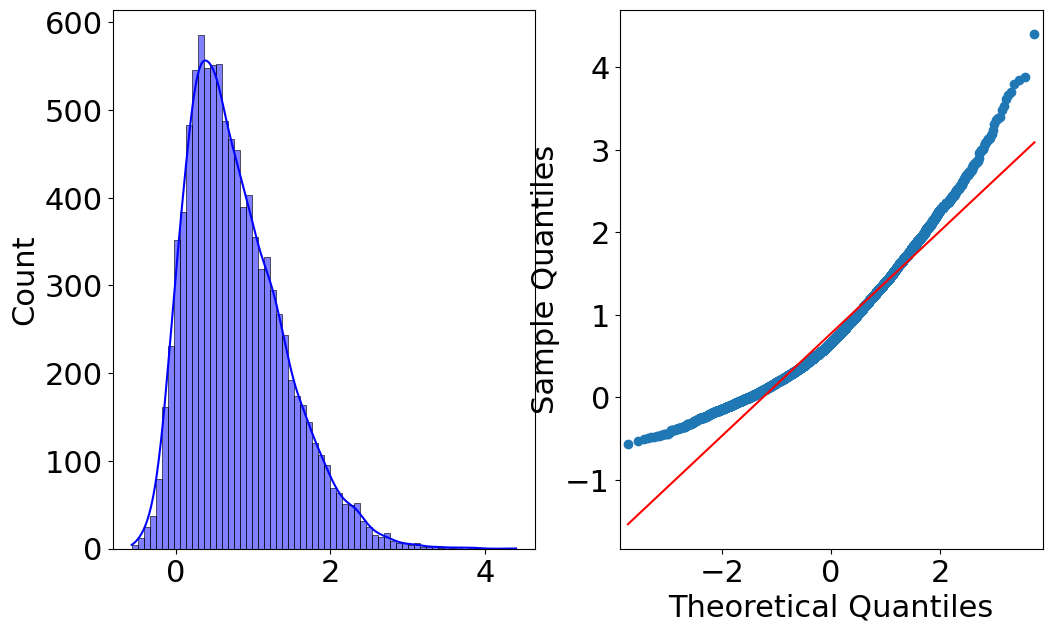

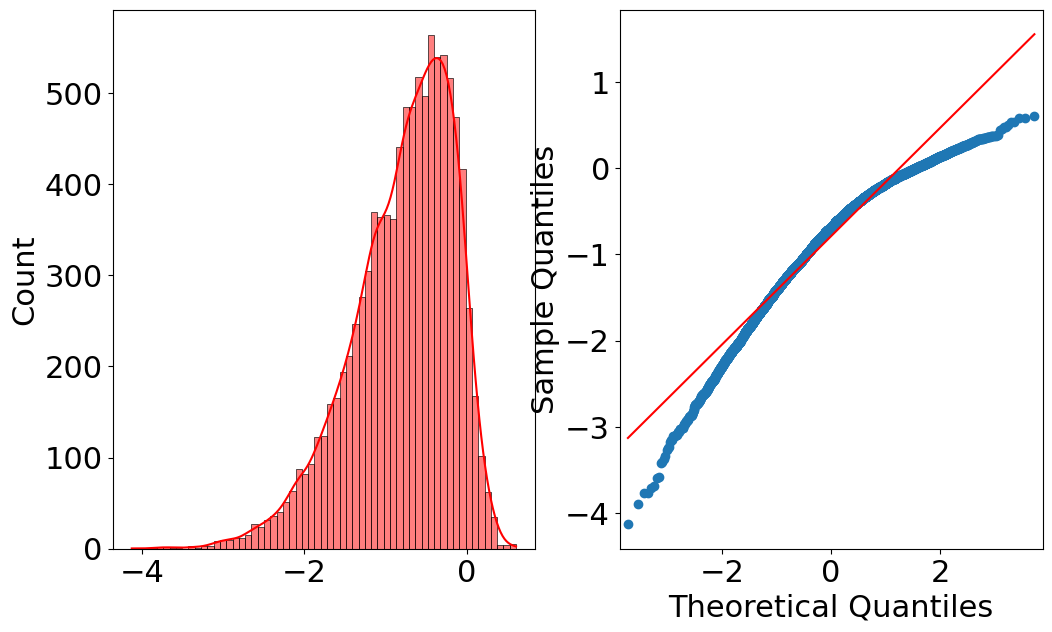

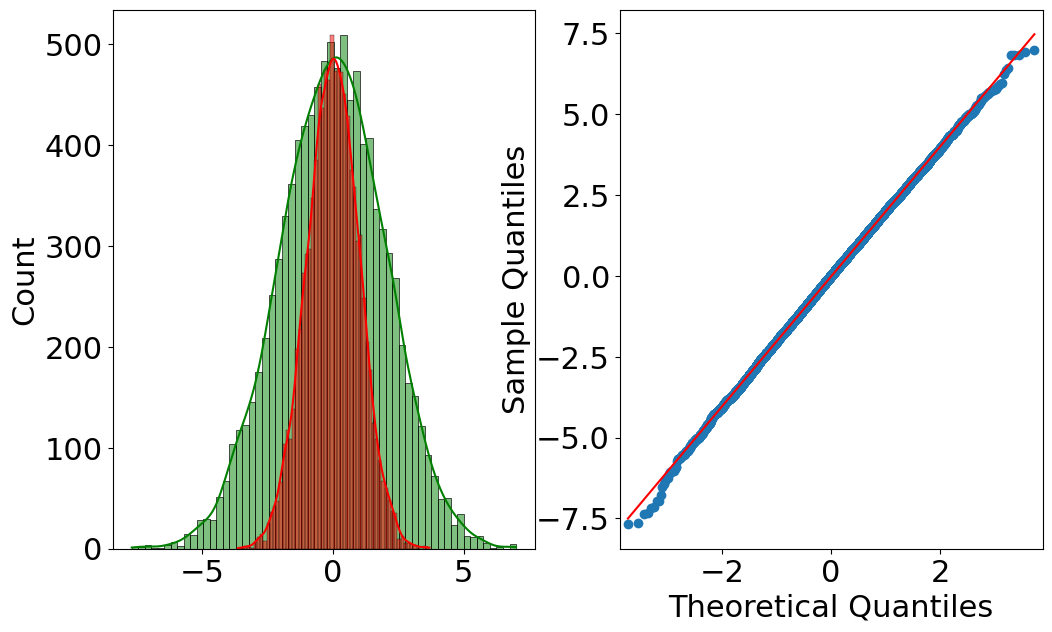

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm

# define distributions
sample_size = 10000
standard_norm = np.random.normal(size=sample_size)
heavy_tailed_norm = np.random.normal(loc=0, scale=2, size=sample_size)
skewed_norm = sc.skewnorm.rvs(a=5, size=sample_size)
skew_left_norm = sc.skewnorm.rvs(a=-5, size=sample_size)


# plots for standard distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(standard_norm,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(standard_norm).qqplot(line='s', ax=ax[1])

# plot for right-tailed distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(skewed_norm).qqplot(line='s', ax=ax[1]);
sns.histplot(skewed_norm,kde=True, color ='blue',ax=ax[0])

# plot for left-tailed distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(skew_left_norm).qqplot(line='s',color='red', ax=ax[1]);
sns.histplot(skew_left_norm,kde=True, color ='red',ax=ax[0])

# plot for heavy tailed distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(heavy_tailed_norm).qqplot(line='s',color ='green', ax=ax[1]);
sns.histplot(heavy_tailed_norm,kde=True, color ='green',ax=ax[0])
sns.histplot(standard_norm,kde=True, color ='red',ax=ax[0])

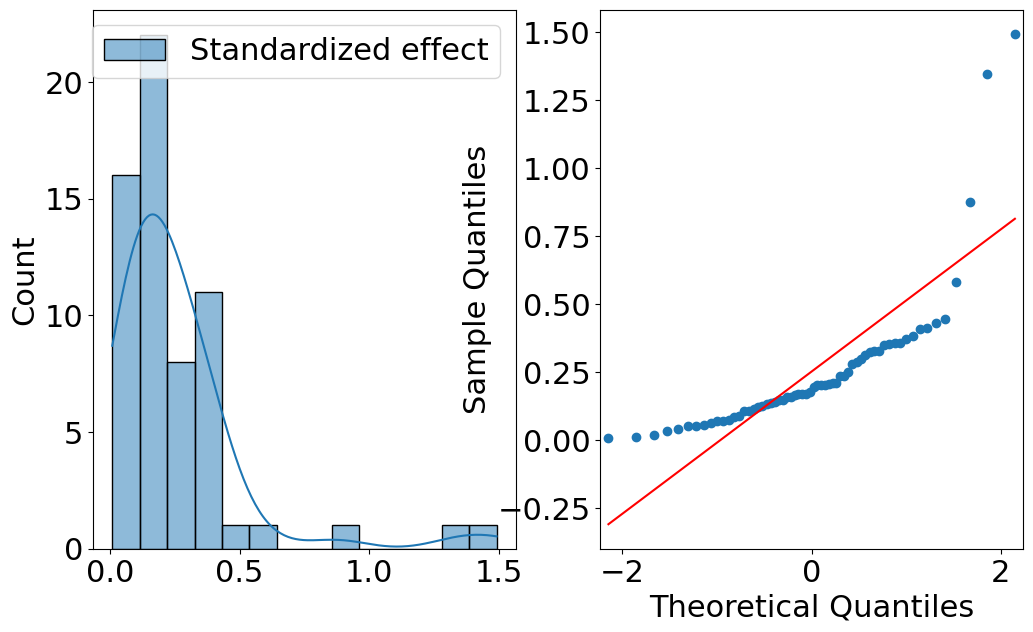

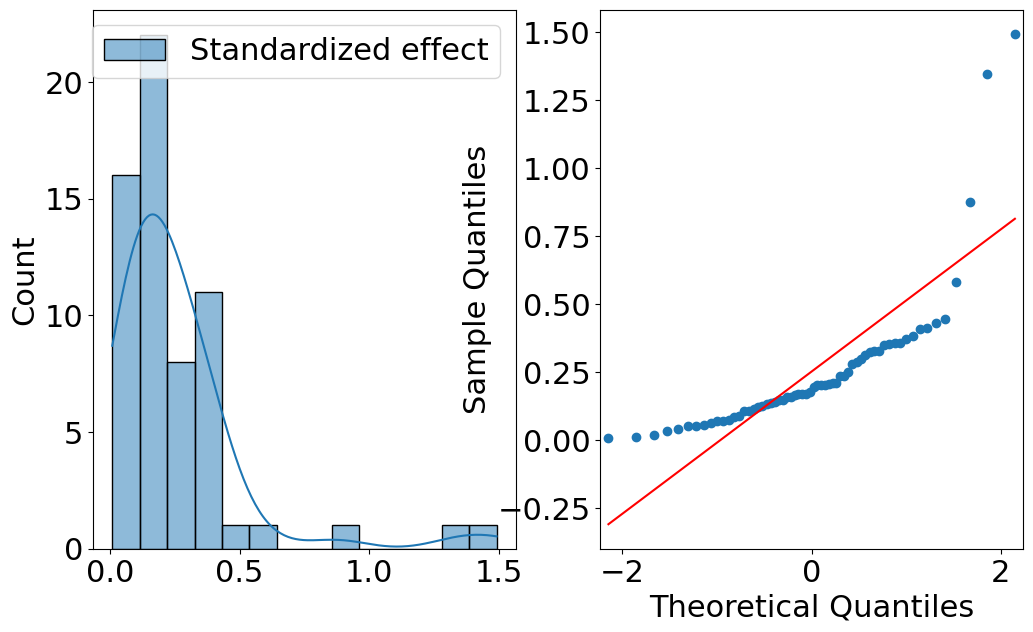

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(effects_sorted,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(effects_sorted).qqplot(line='s', ax=ax[1])


In [51]:
mod_final = smf.ols(formula='y1 ~ x1 + x4 + x6', data=doe)

res_final = mod_final.fit()
res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     28.25
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.63e-11
Time:                        21:03:28   Log-Likelihood:                -129.95
No. Observations:                  64   AIC:                             267.9
Df Residuals:                      60   BIC:                             276.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1234      0.238     46.741      0.000      10.647      11.599
x1             0.8734      0.238      3.670      0.001       0.397       1.349
x4             1.4922      0.238      6.270      0.000       1.016       1.968
x6             1.3453      0.238      5.653      0.000       0.869       1.821
==============================================================================
Omnibus:                        0.690   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.586
Skew:                           0.229   Prob(JB):                        0.746
Kurtosis:                       2.897   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The standard deviation of the model is calculated through:

In [57]:
res_final.scale**.5

1.903831115584223

which is dentical to np.sqrt(np.sum(res_final.resid**2)/res_final.df_resid)

In final, let's plt the regression plot.

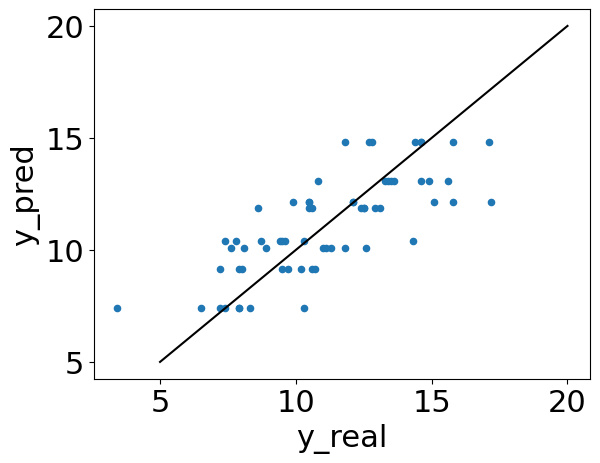

In [60]:

ypred = res_final.predict(doe.loc[:,'x1':'x6'])
#print(ypred)

d = pd.DataFrame({'y_pred':ypred,'y_real':doe['y1']})
d.plot.scatter(x='y_real', y='y_pred')

x=np.linspace(5,20,101)

plt.plot(x,x,'k-') # identity line

and the residual plot

Text(0, 0.5, 'residual')

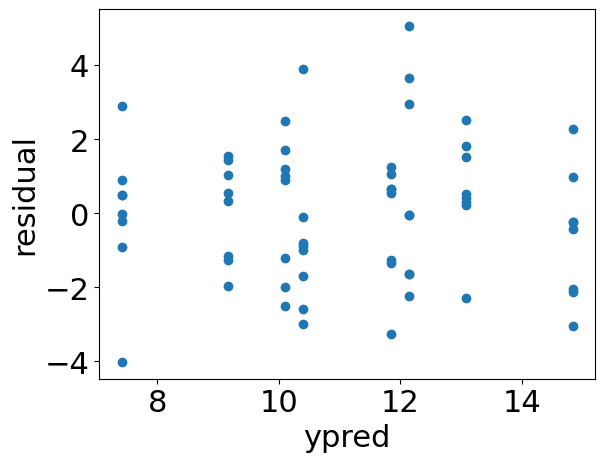

In [69]:
plt.scatter(ypred,res_final.resid)
plt.xlabel('ypred')
plt.ylabel('residual')